In [37]:
%run model-test.ipynb

In [201]:
x = torch.randn(16, 10)

m = Model()

y = m(x)
y.shape

x2 = torch.randn((16, 1, 40, 40))

In [39]:
for i in m.modules():
    print(type(i))

<class '__main__.Model'>
<class 'torch.nn.modules.linear.Linear'>


Drawing

In [218]:
from PIL import Image, ImageDraw, ImageFont

WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
MAX_LENGTH = 5

def draw_1d_layer(draw, length, diameter, font, x_offset=0, y_offset=0, spacing=10):
    
    if length > MAX_LENGTH:
        for i in range(MAX_LENGTH):
            draw.ellipse([(x_offset, i*diameter+spacing*i + y_offset), (x_offset + diameter, (i+1)*diameter+spacing*i + y_offset)], outline=BLACK)
        draw.text((x_offset, MAX_LENGTH*(diameter+spacing) + y_offset), '...', align='left', fill=BLACK, font=font)
    else:
        for i in range(length):
            draw.ellipse([(x_offset, i*diameter+spacing*i + y_offset), (x_offset + diameter, (i+1)*diameter+spacing*i + y_offset)], outline=BLACK)

def draw_2d_layer(draw, height, width, x_offset=0, y_offset=0):

    # Parallelogram (x, y) coordinates
    shear = int(0.4*height)
    xy = [(x_offset, y_offset+shear), (x_offset+width, y_offset), (x_offset+width, y_offset+height), (x_offset, y_offset+shear+height)]
    draw.polygon(xy, outline=BLACK)
    
          
def draw_model(model, x):

    font = ImageFont.truetype("helvetica.ttf", 20)

    IMG_HEIGHT = 500
    IMG_WIDTH = 500
    NODE_DIAMETER = 40
    NODE_SPACING = 10
    
    img = Image.new("RGB", (IMG_HEIGHT, IMG_WIDTH), WHITE) 
    
    draw = ImageDraw.Draw(img) 
    
    # Draw X

    if len(x.shape) == 2:

        B, X = x.shape[0], x.shape[1]
        draw.text((10, 10), f'X Input: {X}', align='center', fill=BLACK, font=font)
        draw_1d_layer(draw, X, diameter=NODE_DIAMETER, font=font, x_offset=20, y_offset=40)

    elif len(x.shape) == 4:
        B, C, H, W = x.shape[0], x.shape[1], x.shape[2], x.shape[3]
        draw.text((10, 10), f'X Input: ({C}, {H}, {W})', align='center', fill=BLACK, font=font)
        draw_2d_layer(draw, 100, 100, x_offset=20, y_offset=40)

        
    display(img)

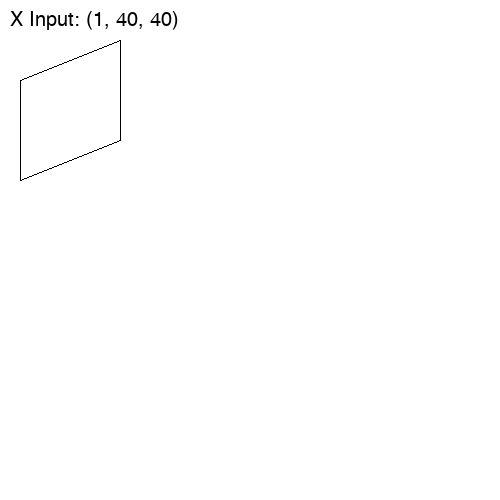

In [219]:
draw_model(m, x2)